In [14]:
import sys
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import preprocessing as prep

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
batch_size = 143
size_output = 143

In [29]:
X, y= prep.load_lstm_data('../data/S_data_2019_04_25/', 'train sensorliving', batch_size, size_output,False)

(1716, 14)


In [30]:
model = torch.load('../experiments/exp1/' + 'LSTM1' + '.pt')

In [31]:
model

Lstm(
  (rnn): LSTM(14, 512, num_layers=2)
  (out): Linear(in_features=512, out_features=143, bias=True)
)

In [32]:
X = torch.from_numpy(X).to(model.device).type(model.dtype)

In [33]:
model.hidden = model.init_hidden(X.shape[1],512)
output = model(X)

In [34]:
pred = output.detach()[:,-1,:]

In [35]:
real = pd.DataFrame(X[:,-1,:].numpy())

In [36]:
for i in range(len(y)): 
    if i==0:
        predictline = pred.numpy()[i,:]
        realline = y[i]
    else:
        predictline = np.append(predictline,(pred.numpy()[i,:]))
        realline = np.append(realline,y[i])

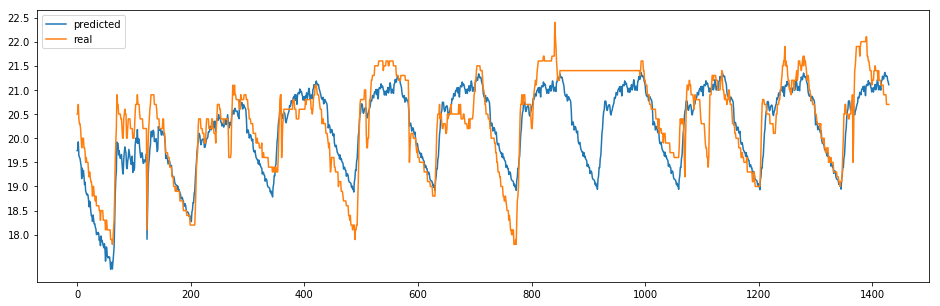

In [37]:
ax3 = plt.figure(2, figsize=(16, 5))
ax3 = plt.subplot()
ax3.plot(predictline)
ax3.plot(realline)
ax3.legend(['predicted','real'])
ax3.set_yticks(np.arange(18, 23, .5));

In [659]:
for i in range(246, len(predictline)):
    predictline[i]-=0.5

In [603]:
predictline[300]

23.827656

In [646]:
error = predictline-realline

In [658]:
error[143:].mean()

0.5135188762958233

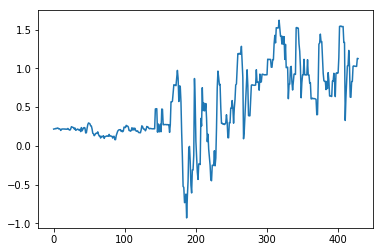

In [657]:
plt.plot(error[143:])